# Week 14 - SciViz + Volume rendering

More `ipyvolume` examples here: https://ipyvolume.readthedocs.io/en/latest/examples.html

In [1]:
import yt
import numpy as np
import ipyvolume
import h5py

In [2]:
# OS specific!
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

Load the galaxy dataset:

In [3]:
ds = yt.load("/Users/jillnaiman/Downloads/IsolatedGalaxy/galaxy0030/galaxy0030")

yt : [INFO     ] 2020-04-21 20:28:45,893 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-04-21 20:28:45,893 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-04-21 20:28:45,894 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-04-21 20:28:45,895 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-04-21 20:28:45,896 Parameters: cosmological_simulation   = 0.0


Let's make a volume render of the variable `density` in our dataset:

In [8]:
sc = yt.create_scene(ds, 'density')

We can check out `sc` and see that it tells us a bit about how the scene is setup, like that there is this camera object thing and where it is pointing:

In [9]:
print(sc)

<Scene Object>:
Sources: 
    source_00: <Volume Source>:YTRegion (galaxy0030): , center=[1.543e+24 1.543e+24 1.543e+24] cm, left_edge=[0. 0. 0.] cm, right_edge=[3.086e+24 3.086e+24 3.086e+24] cm transfer_function:None
Camera: 
    <Camera Object>:
	position:[1. 1. 1.] code_length
	focus:[0.5 0.5 0.5] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[1.5 1.5 1.5] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[-866025.33679714 -866025.33679714 -866025.33679714] code_length


Let's take a quick look:

yt : [INFO     ] 2020-04-21 20:32:59,026 Rendering scene (Can take a while).
yt : [INFO     ] 2020-04-21 20:32:59,028 Creating volume
yt : [INFO     ] 2020-04-21 20:33:00,976 Creating transfer function
yt : [INFO     ] 2020-04-21 20:33:00,977 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


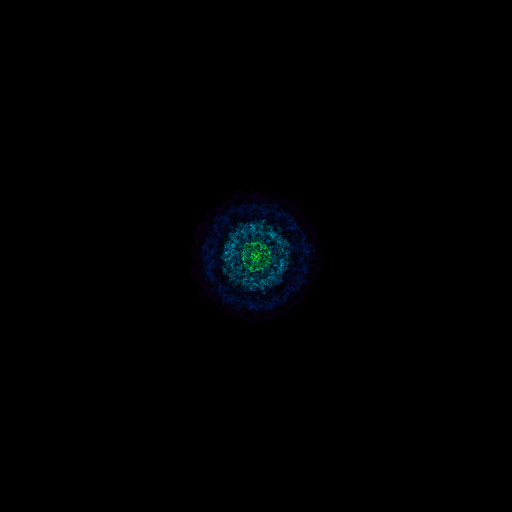

In [10]:
sc.show()

Neat, but let's also zoom in by changing the width of the image:

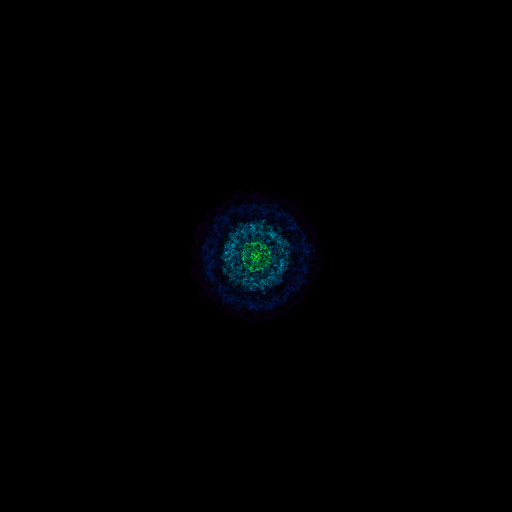

In [11]:
sc.camera.width = (300, 'kpc')
sc.show()

Hey what happened?  We have to explicitly change the orientation of the camera (think of this sort of like a call-back):

In [12]:
sc.camera.switch_orientation?

yt : [INFO     ] 2020-04-21 20:35:00,539 Rendering scene (Can take a while).
yt : [INFO     ] 2020-04-21 20:35:00,541 Creating volume
yt : [INFO     ] 2020-04-21 20:35:02,556 Creating transfer function
yt : [INFO     ] 2020-04-21 20:35:02,556 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


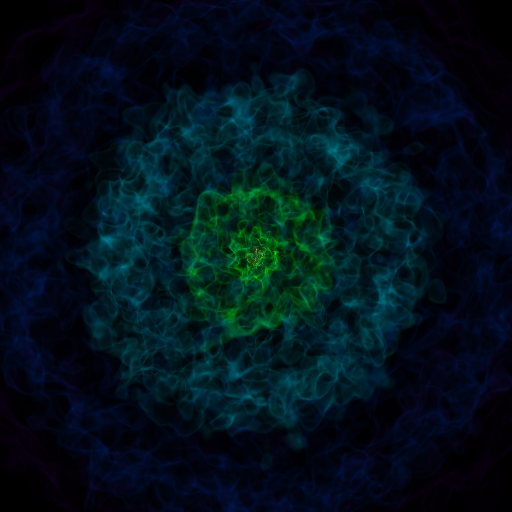

In [14]:
sc = yt.create_scene(ds, 'density')
sc.camera.width = (300, 'kpc')
sc.camera.switch_orientation()
sc.show()

We can also do this with the brain scan dataset.

Get our brain-scan data with yt + h5py like before:

In [15]:
with h5py.File("/Users/jillnaiman/Downloads/single_dicom.h5", "r") as f:
    scan_data = f["/scan"][:]

In [16]:
scan_data.shape

(36, 512, 512)

In [17]:
dsd = yt.load_uniform_grid({'scan': scan_data},
                     [36, 512, 512],
                     length_unit = yt.units.cm, # specify the units of this dataset
                     bbox = np.array([[0., 10], [0, 10], [0, 10]]), # give a "size" to this dataset
)

yt : [INFO     ] 2020-04-21 20:38:25,861 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-04-21 20:38:25,861 Parameters: domain_dimensions         = [ 36 512 512]
yt : [INFO     ] 2020-04-21 20:38:25,862 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-04-21 20:38:25,863 Parameters: domain_right_edge         = [10. 10. 10.]
yt : [INFO     ] 2020-04-21 20:38:25,863 Parameters: cosmological_simulation   = 0.0


Let's recall there is only 1 field in there when we load data this way:

In [18]:
dsd.field_list

[('stream', 'scan')]

Recall, we can make some quick plots:

yt : [INFO     ] 2020-04-21 20:40:23,519 Rendering scene (Can take a while).
yt : [INFO     ] 2020-04-21 20:40:23,521 Creating volume
/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/yt/units/yt_array.py:1396: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out, **kwargs)
yt : [INFO     ] 2020-04-21 20:40:24,071 Creating transfer function
yt : [INFO     ] 2020-04-21 20:40:24,072 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


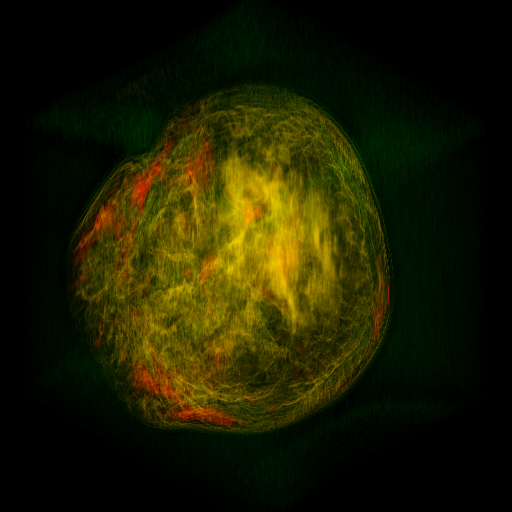

In [19]:
sc = yt.create_scene(dsd, 'scan')
sc.show()

That's ok, but the camera location doesn't look as great.  Let's move it!

In [22]:
sc.camera

<Camera Object>:
	position:[10. 10. 10.] code_length
	focus:[5. 5. 5.] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[15. 15. 15.] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:plane-parallel
	viewpoint:[-8660253.36797141 -8660253.36797141 -8660253.36797141] code_length

yt : [INFO     ] 2020-04-21 20:48:31,609 Rendering scene (Can take a while).
yt : [INFO     ] 2020-04-21 20:48:31,611 Creating volume
yt : [INFO     ] 2020-04-21 20:48:31,864 Creating transfer function
yt : [INFO     ] 2020-04-21 20:48:31,864 Calculating data bounds. This may take a while.  Set the TransferFunctionHelper.bounds to avoid this.


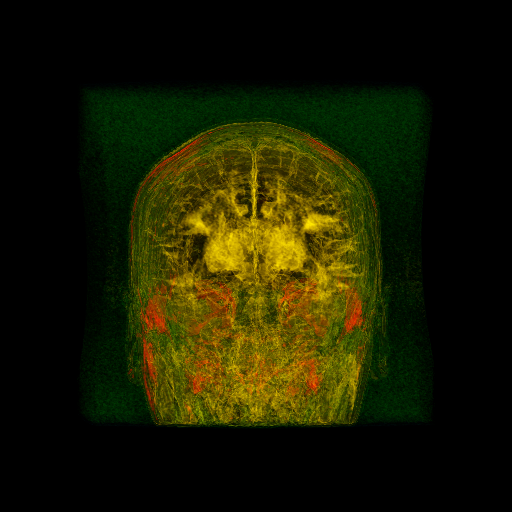

In [32]:
sc = yt.create_scene(dsd, 'scan')
sc.camera.position = [10, 0, 0] # placement
sc.camera.north_vector = [0,-1,0] # orientation of "up"
sc.camera.switch_orientation()
sc.show()

Finally, let's use `ipyvolume` to make an interactive volume rendering:

In [34]:
ipyvolume.figure()
ipyvolume.volshow(scan_data)#, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)
ipyvolume.show()

/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipyvolume/widgets.py:179: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data_view = self.data_original[view]
/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipyvolume/utils.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = (data[slices1] + data[slices2])/2
/Users/jillnaiman/opt/anaconda3/lib/python3.7/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]

Technically, there is only a density that we are plotting here, so we can plot just one level (note, all 3 widgets show up but they don't do anything)>

In [35]:
ipyvolume.volshow?

In [36]:
ipyvolume.figure()
ipyvolume.volshow(scan_data, level=[0.25])
ipyvolume.show()

# WALK THROUGH: HOW TO UPLOAD THIS TO MYBINDER?